# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [2]:
# insert code
print(df['left_company'].value_counts())

No     500
Yes    500
Name: left_company, dtype: int64


Here Class 'No' has 500 values and Class 'Yes' has 500 values. So I do not see any imbalances in distribution.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [21]:
numerical_vars = ['age', 'commuting_distance', 'satisfaction_with_environment', 'seniority_level', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company',  'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']
categorical_Vars = ['department', 'frequency_of_travel','education', 'gender', 'seniority_level', 'position','satisfaction_with_job', 'married_or_single', 'left_company']

Above mentioned lists for numerical variables and categorical variables are my cchoices based on data set and the variables.

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [22]:
# insert code here
corr_mat=df[numerical_vars].corr()
corr_mat

,age,commuting_distance,satisfaction_with_environment,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
age,1.000000,0.012074,0.001556,0.522604,0.095242,0.027851,0.003629,0.673804,0.384760,0.310010,0.242456,0.273679
commuting_distance,0.012074,1.000000,-0.019556,0.038915,0.023859,0.104421,0.089282,0.025593,0.023017,0.031890,0.047552,0.031520
satisfaction_with_environment,0.001556,-0.019556,1.000000,0.009462,-0.006160,0.014812,0.006943,-0.027203,0.001339,0.023698,0.042132,0.021875
seniority_level,0.522604,0.038915,0.009462,1.000000,0.040606,-0.022683,-0.029956,0.779351,0.572724,0.478151,0.392935,0.430047
satisfaction_with_job,0.095242,0.023859,-0.006160,0.040606,1.000000,-0.037273,-0.089030,0.029119,0.071920,0.037591,0.038015,0.001472
last_raise_pct,0.027851,0.104421,0.014812,-0.022683,-0.037273,1.000000,0.792791,-0.004905,0.004435,0.039691,0.000615,0.060882
last_performance_rating,0.003629,0.089282,0.006943,-0.029956,-0.089030,0.792791,1.000000,0.014877,0.022364,0.087038,0.030595,0.100502
total_years_working,0.673804,0.025593,-0.027203,0.779351,0.029119,-0.004905,0.014877,1.000000,0.685955,0.548494,0.423619,0.506007
years_at_company,0.384760,0.023017,0.001339,0.572724,0.071920,0.004435,0.022364,0.685955,1.000000,0.801423,0.630344,0.781147
years_in_current_job,0.310010,0.031890,0.023698,0.478151,0.037591,0.039691,0.087038,0.548494,0.801423,1.000000,0.611928,0.781647


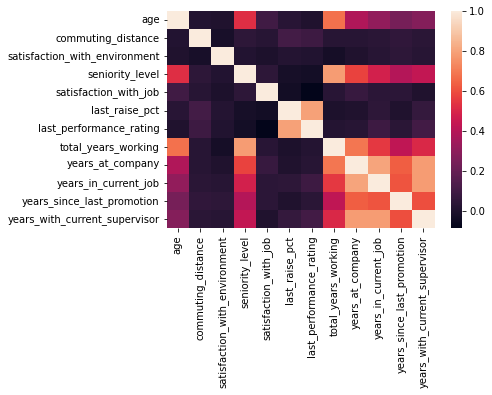

In [38]:
import seaborn as sns
sns.heatmap(corr_mat)
plt.show()

In [23]:
numerical_vars.remove('total_years_working')
numerical_vars.remove('years_at_company')

The variables "total_years_working" and "years_at_company" have been identified as exhibiting multicollinearity, so they will be removed from the numerical_vars list.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [24]:
# insert code here
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=124)
print(train)
print(test)

    left_company  age frequency_of_travel              department  \
294           No   35       Travel_Rarely  Research & Development   
766          Yes   33       Travel_Rarely  Research & Development   
28            No   47          Non-Travel  Research & Development   
85            No   30       Travel_Rarely                   Sales   
176           No   27       Travel_Rarely  Research & Development   
..           ...  ...                 ...                     ...   
962          Yes   24       Travel_Rarely                   Sales   
135           No   38       Travel_Rarely  Research & Development   
17            No   40       Travel_Rarely  Research & Development   
668          Yes   34          Non-Travel  Research & Development   
462           No   32       Travel_Rarely  Research & Development   

     commuting_distance  education  satisfaction_with_environment  gender  \
294                   7          3                              3    Male   
766              

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [27]:
# insert code here
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# define  numerical pipeline
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
#  Define Categorical pipeline
# Preprocessor pipeline
cat_pipeline = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, numerical_vars),('cat', cat_pipeline, categorical_Vars)])
# transform training data
train_processed =preprocessor.fit_transform(train)


In [28]:
#numerical pipeline
train_processed[:, :7].shape

(800, 7)

In [30]:
#categorical pipeline
train_processed[:, 7:].shape

(800, 39)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [34]:
# insert code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic regression pipeline
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(random_state=124))])
# Fit the model on the training data
logreg_pipeline.fit(train, train['left_company'])
# Predict the training and test sets
train_prediction = logreg_pipeline.predict(train)
test_prediction = logreg_pipeline.predict(test)
# Print the accuracy on the training and test sets
train_accuracy = accuracy_score(train['left_company'], train_prediction)
test_accuracy = accuracy_score(test['left_company'], test_prediction)

In [36]:
print(train_accuracy)
print(test_accuracy)

1.0
1.0


The train accuracy and test accuracy are same so I feel that the model is overfitting the data

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Below are the potential next steps taken to develop and evaluate a model:

Alternate your metrics: Although precision is a popular measure, it may not always be the best choice. To gain a greater understanding of the model's success, take into account using additional metrics like precision, recall, or F1-score.

Cross-validation: Use cross-validation on the training data to evaluate how well the model generalizes. By doing so, it will become clearer whether the model is overfitting or actually working well.

Hyperparameter adjustment: Apply hyperparameter tweaking to enhance the model's functionality. This may entail altering the solver method, the regularization intensity, or other model-specific hyperparameters.

Collect more Data: More data should be gathered if the model is overfitting the data, as this could enhance model efficiency and lessen overfitting.